In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
df = pd.read_csv('My fyp doc (2).csv')

In [3]:
df.keys()

Index(['Age', 'Gender', 'Fever ', 'Cough ', 'Pneumonia ', 'Lungs infection ',
       'Runny Nose', 'Muscles soreness ', 'Diarrhea ', 'Travel history ',
       'Isolation '],
      dtype='object')

In [4]:
df.head()

,Age,Gender,Fever,Cough,Pneumonia,Lungs infection,Runny Nose,Muscles soreness,Diarrhea,Travel history,Isolation
0,10,Male,True,True,False,False,True,False,True,False,True
1,5,Female,True,False,True,False,True,False,True,True,True
2,20,Male,False,True,False,False,True,False,True,False,True
3,25,Female,False,False,True,False,True,False,False,False,True
4,27,Male,True,True,False,False,True,True,False,True,True


In [5]:
df.dtypes

Age                   int64
Gender               object
Fever                  bool
Cough                  bool
Pneumonia              bool
Lungs infection        bool
Runny Nose             bool
Muscles soreness       bool
Diarrhea               bool
Travel history         bool
Isolation              bool
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                16 non-null     int64 
 1   Gender             16 non-null     object
 2   Fever              16 non-null     bool  
 3   Cough              16 non-null     bool  
 4   Pneumonia          16 non-null     bool  
 5   Lungs infection    16 non-null     bool  
 6   Runny Nose         16 non-null     bool  
 7   Muscles soreness   16 non-null     bool  
 8   Diarrhea           16 non-null     bool  
 9   Travel history     16 non-null     bool  
 10  Isolation          16 non-null     bool  
dtypes: bool(9), int64(1), object(1)
memory usage: 528.0+ bytes


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5

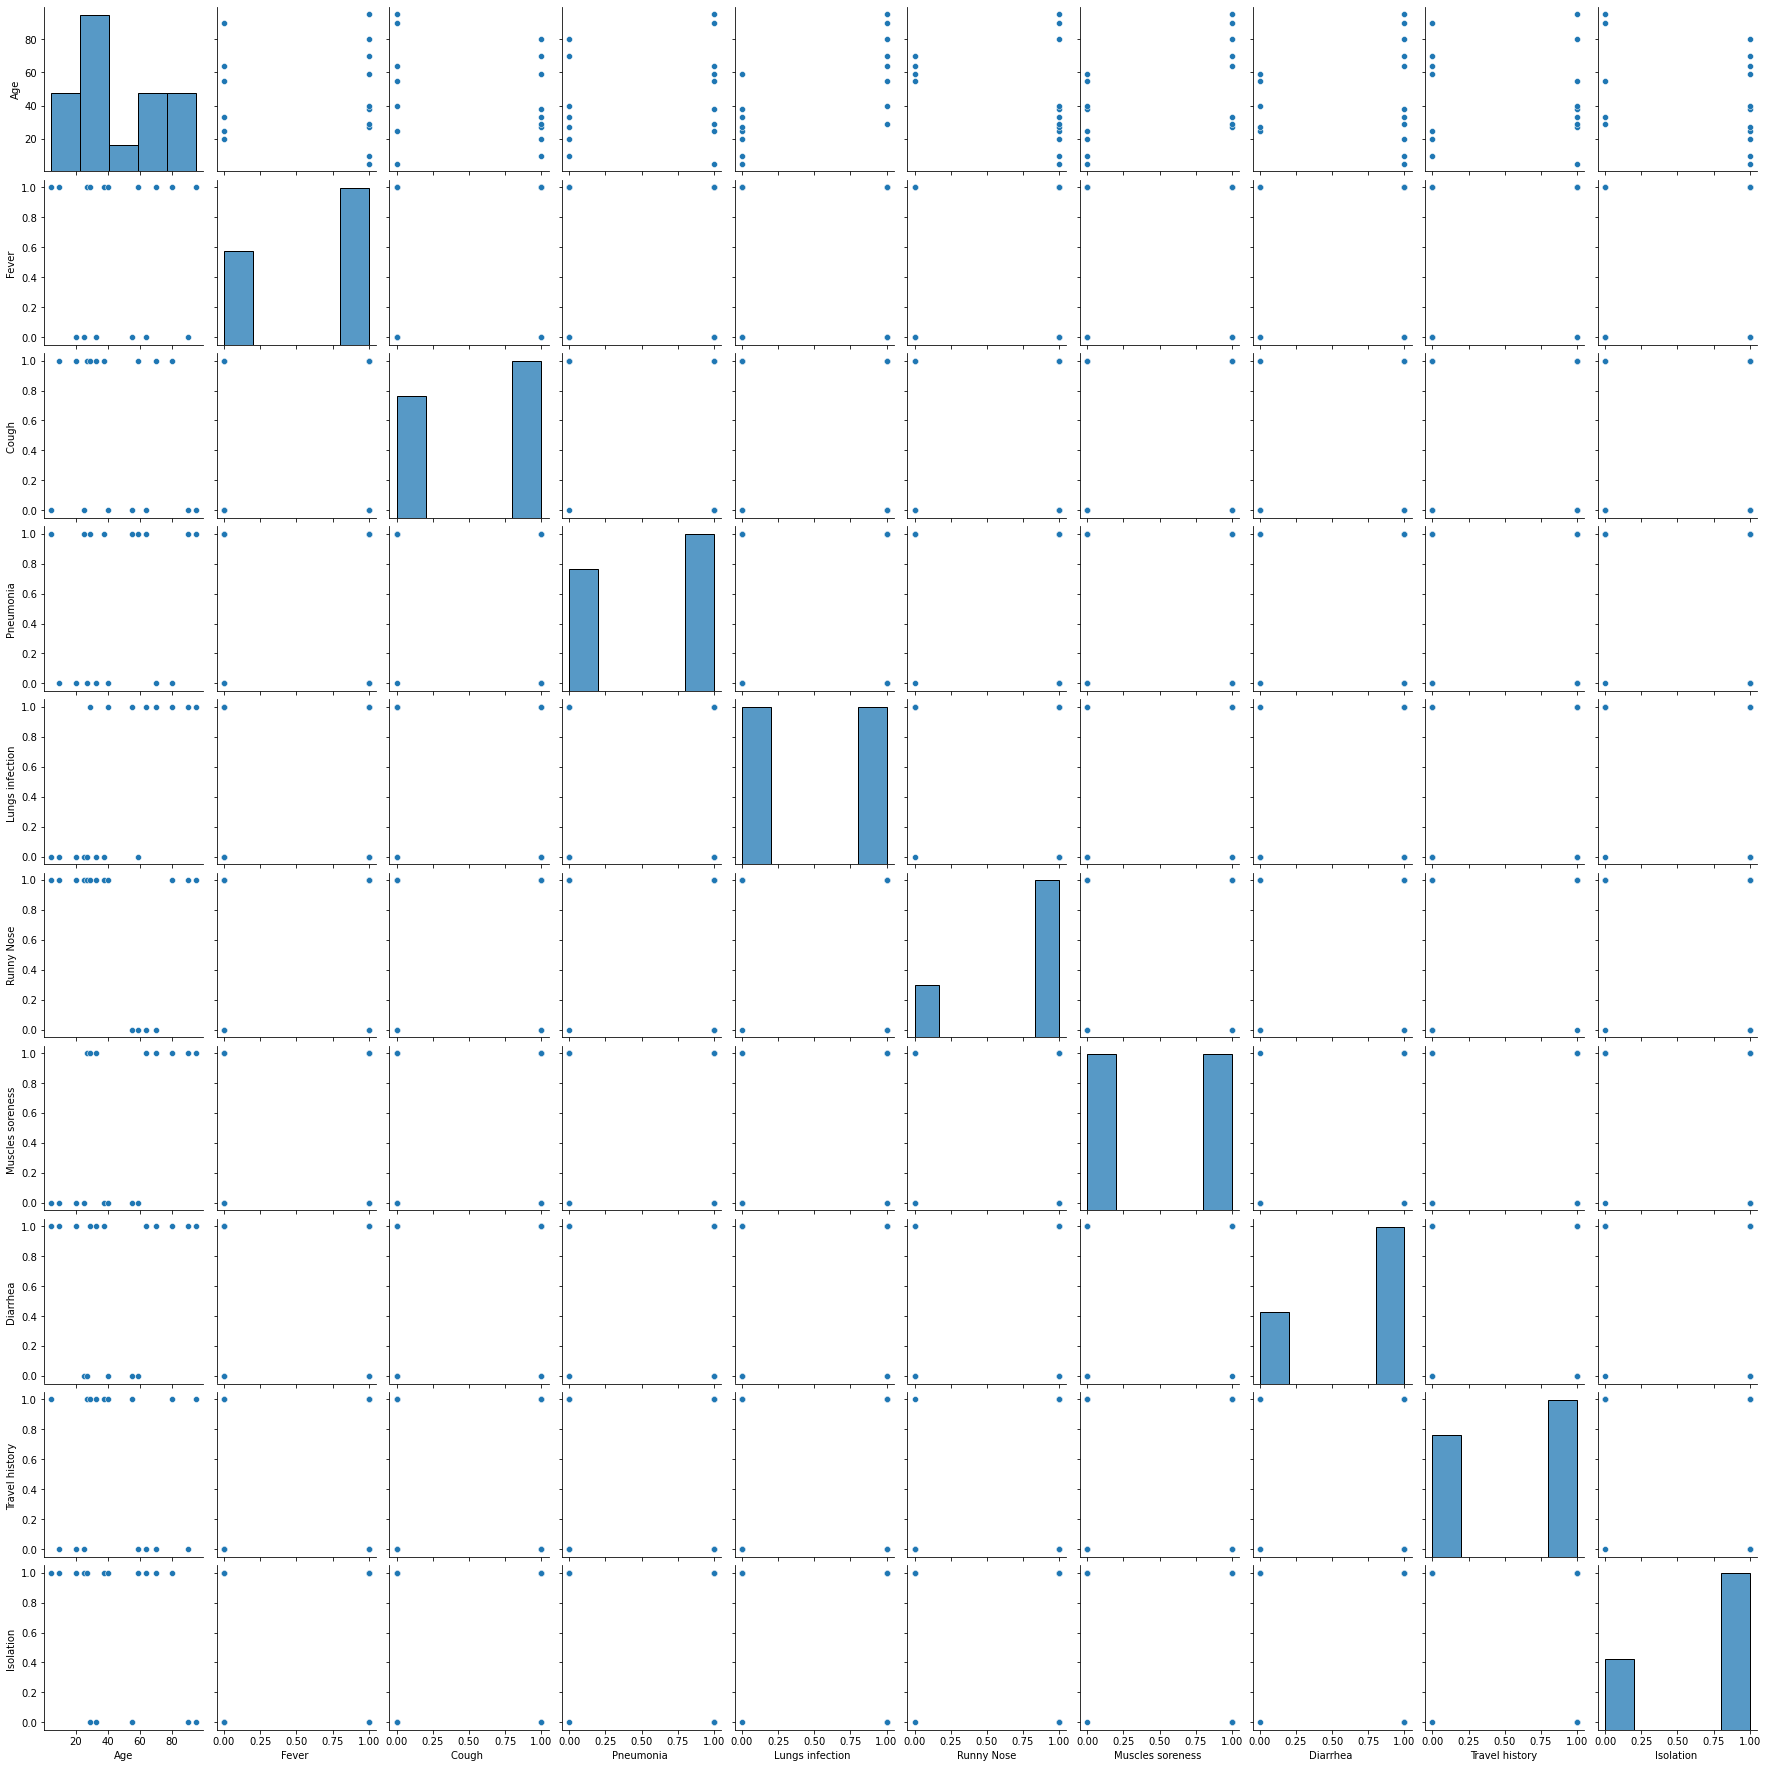

In [7]:
sns.pairplot(df,palette='magma')

In [8]:
df.isnull().sum()

Age                  0
Gender               0
Fever                0
Cough                0
Pneumonia            0
Lungs infection      0
Runny Nose           0
Muscles soreness     0
Diarrhea             0
Travel history       0
Isolation            0
dtype: int64

In [9]:
df.describe()

,Age
count,16.00000
mean,46.25000
std,27.87472
min,5.00000
25%,26.50000
50%,39.00000
75%,65.50000
max,95.00000


In [10]:
#Train Test Split
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop('Gender',axis=1)
y = df['Gender']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [13]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [14]:
dtree = DecisionTreeClassifier()

In [15]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [16]:
predictions = dtree.predict(X_test)

In [17]:
from sklearn.metrics import classification_report,confusion_matrix

In [18]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      Female       1.00      0.50      0.67         2
     Females       0.00      0.00      0.00         1
        Male       1.00      0.50      0.67         2
Male females       0.00      0.00      0.00         0

    accuracy                           0.40         5
   macro avg       0.50      0.25      0.33         5
weighted avg       0.80      0.40      0.53         5



/home/aqib/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aqib/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
print(confusion_matrix(y_test,predictions))

[[1 0 0 1]
 [0 0 0 1]
 [0 0 1 1]
 [0 0 0 0]]


In [20]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

In [21]:
rfc = RandomForestClassifier(n_estimators=600)

In [22]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [23]:
predictions = rfc.predict(X_test)

In [24]:
from sklearn.metrics import classification_report,confusion_matrix

In [36]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

        Both       0.00      0.00      0.00         0
      Female       0.00      0.00      0.00         2
     Females       0.00      0.00      0.00         1
        Male       0.50      1.00      0.67         2

    accuracy                           0.40         5
   macro avg       0.12      0.25      0.17         5
weighted avg       0.20      0.40      0.27         5



/home/aqib/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aqib/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
print(confusion_matrix(y_test,predictions))

[[0 0 0 0]
 [1 0 0 1]
 [0 0 0 1]
 [0 0 0 2]]


In [27]:
# SVC
from sklearn.svm import SVC

In [28]:
svc = SVC()

In [29]:
svc.fit(X_train,y_train)

SVC()

In [30]:
prediction = svc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix

In [31]:
classification_report(y_test,prediction)

/home/aqib/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n      Female       0.00      0.00      0.00         2\n     Females       0.00      0.00      0.00         1\n        Male       0.40      1.00      0.57         2\n\n    accuracy                           0.40         5\n   macro avg       0.13      0.33      0.19         5\nweighted avg       0.16      0.40      0.23         5\n'

In [32]:
confusion_matrix(y_test,prediction)

array([[0, 0, 2],
       [0, 0, 1],
       [0, 0, 2]])

In [33]:
# PCA
from sklearn.preprocessing import StandardScaler

In [34]:
standard_scaler = StandardScaler(with_mean=True, with_std=True)

In [1]:
standard_scaler.fit(df)

In [ ]:
scaled_data = standard_scaler.transform(df)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA( n_components=2)

In [ ]:
pca.fit(scaled_data)

In [ ]:
x_pca = pca.transform(scaled_data)

In [ ]:
x_pca.shape

In [ ]:
pca.components_

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(pca.components_,cmap='magma')

In [ ]:
# XG Boost ML Algorithm

In [ ]:
df = df.drop('Gender',axis=1)

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [ ]:
X, y = df.iloc[:,:-1],df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
xg_reg.fit(X_train,y_train)

In [ ]:
df_dmatrix = xgb.DMatrix(data=X,label=y)

In [ ]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

In [ ]:
cv_results = xgb.cv(dtrain=df_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [ ]:
cv_results.head()

In [ ]:
print((cv_results["test-rmse-mean"]).tail(1))


In [ ]:
xg_reg = xgb.train(params=params, dtrain=df_dmatrix, num_boost_round=10)

In [ ]:
labels = '', '', '', ''
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()